In [1]:
%matplotlib inline

import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
train = pd.read_csv("train.csv", header = 0)

In [3]:
train.describe()

/home/mbaroody/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train.shape

(1460, 81)

# Features vs. Sale Price Plots For Numerical Features Only, Zeros Trimmed

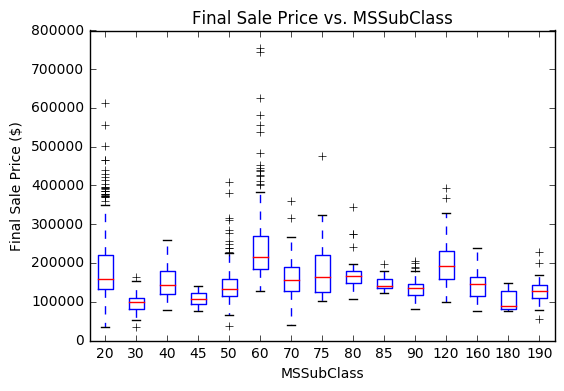

In [38]:
# find numerical features only
num_features = [num_feature for num_feature in train.columns.values if train[num_feature].dtype == 'int64']

features_dropdown = widgets.Dropdown(
    options=num_features,
    value='Id',
    description='Feature',
    disabled=False,
    button_style='info' # 'success', 'info', 'warning', 'danger' or ''
)

def plot_feature_vs_final_price(feature):
    
    if feature == 'MSSubClass':
        labels = np.unique(train['MSSubClass'].values)
        data = {l: list() for l in labels}
        for idx, val in enumerate(train['SalePrice'].values):
            data[train['MSSubClass'].values[idx]].append(val)
        data = [d[1] for d in sorted(list(data.items()), key=lambda x: x[0])]
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Final Sale Price vs. %s' % feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Final Sale Price ($)')
        ax.boxplot(data, labels=labels)
        plt.show()
    else:
        x = train[feature].values
        y = train['SalePrice'].values
    
        #find zero indices
        zero_indices = np.where(x == 0)[0]
        #delete these datapoints from x and y
    
        x = np.delete(x, zero_indices)
        y = np.delete(y, zero_indices)
    
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Final Sale Price vs. %s' % feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Final Sale Price ($)')

        ax.scatter(x, y)
        plt.show()

widgets.interact(plot_feature_vs_final_price, feature=features_dropdown)




In [104]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

In [40]:
missing_perc=train.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))
sorted_missing = missing_perc.sort_values(ascending = False)
sorted_missing



SalePrice        100.000000
ExterCond        100.000000
YearRemodAdd     100.000000
RoofStyle        100.000000
RoofMatl         100.000000
Exterior1st      100.000000
Exterior2nd      100.000000
ExterQual        100.000000
Foundation       100.000000
1stFlrSF         100.000000
BsmtFinSF1       100.000000
BsmtFinSF2       100.000000
BsmtUnfSF        100.000000
TotalBsmtSF      100.000000
SaleCondition    100.000000
HeatingQC        100.000000
YearBuilt        100.000000
OverallCond      100.000000
OverallQual      100.000000
HouseStyle       100.000000
BldgType         100.000000
Condition2       100.000000
Condition1       100.000000
Neighborhood     100.000000
LandSlope        100.000000
LotConfig        100.000000
Utilities        100.000000
LandContour      100.000000
LotShape         100.000000
Street           100.000000
                    ...    
KitchenQual      100.000000
BedroomAbvGr     100.000000
PavedDrive       100.000000
PoolArea         100.000000
MiscVal          100

In [36]:
del train['MiscFeature']
del train['Alley']
del train['Fence']
del train['PoolQC']

In [37]:
train.shape

(1460, 77)

In [38]:

missing_perc=train.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))
sorted_missing = missing_perc.sort_values(ascending = False)
sorted_missing

FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrType        0.547945
MasVnrArea        0.547945
Electrical        0.068493
RoofMatl          0.000000
RoofStyle         0.000000
SalePrice         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
BldgType          0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
Condition2        0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [15]:
train = train.fillna(train.mean())

NameError: name 'train' is not defined

In [30]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [25]:
test = pd.read_csv("test.csv", header = 0)

In [26]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [29]:
missing_perc=test.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))
sorted_missing = missing_perc.sort_values(ascending = False)
sorted_missing

del test['MiscFeature']
del test['Alley']
del test['Fence']
del test['PoolQC']

In [37]:
train_target = train['SalePrice']
test_data = test
test_data.shape

(1459, 76)

In [41]:
cat_columns = train.select_dtypes(['category']).columns
cat_columns

Index([], dtype='object')

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 50)
forest.fit(test_data,train_target )

ValueError: could not convert string to float: 'Normal'